In [36]:
from fish_helpers import *
md_path = '/hybedata/Images/Zach/InVivo/18Hr_Debridement_2019Oct14/'
md = Metadata(md_path)
old_beads = pickle.load(open(os.path.join(md_path,'results','beads.pkl'),'rb'))
old_tforms = pickle.load(open(os.path.join(md_path,'results','tforms.pkl'),'rb'))

In [37]:
print(len(old_tforms['good']))
print(len(old_tforms['bad']))

46
138


46  Good Positions
138  Failed Positions


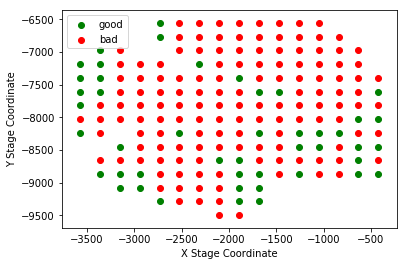

In [38]:
%matplotlib inline
onfly_qc(md)

hybe2


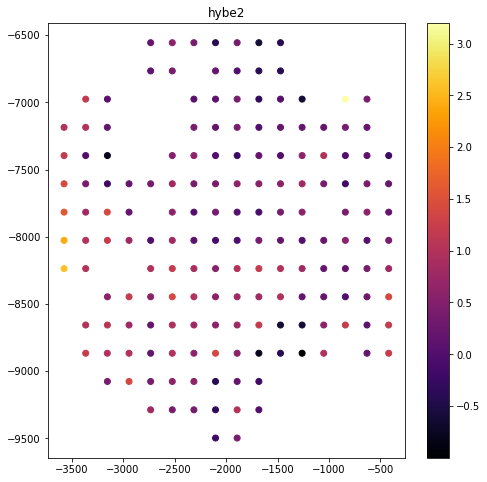

hybe3


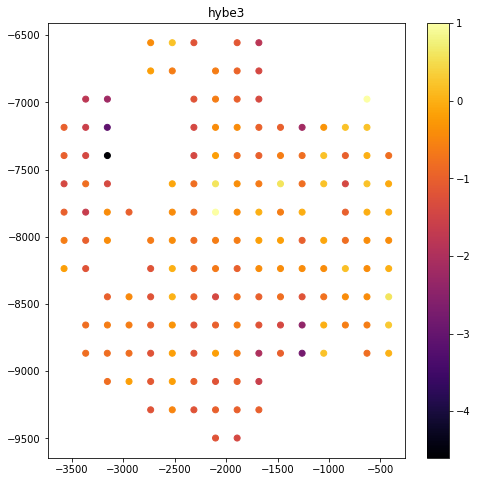

hybe4


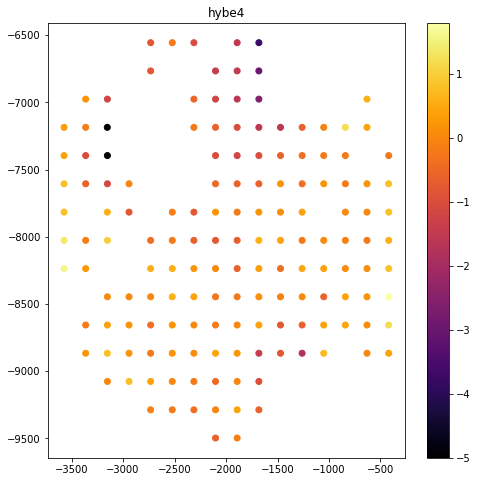

hybe5


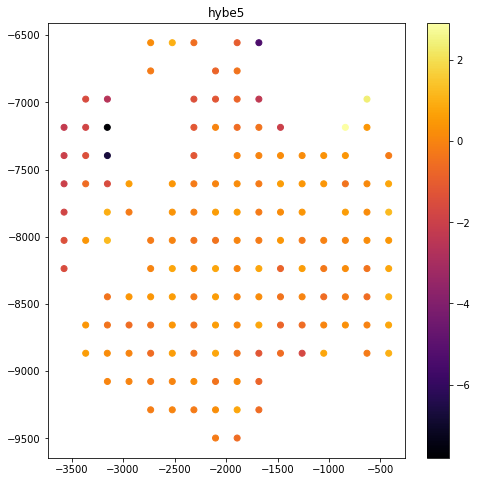

hybe6


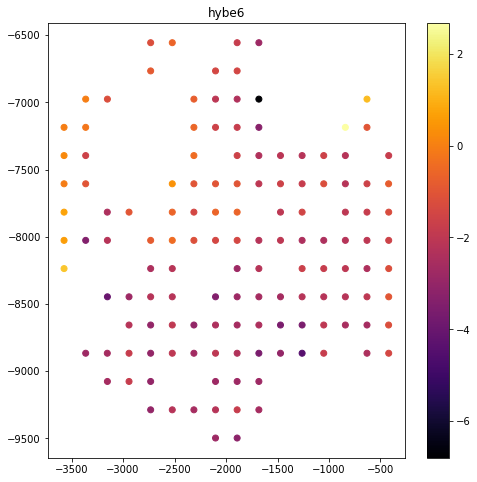

hybe7


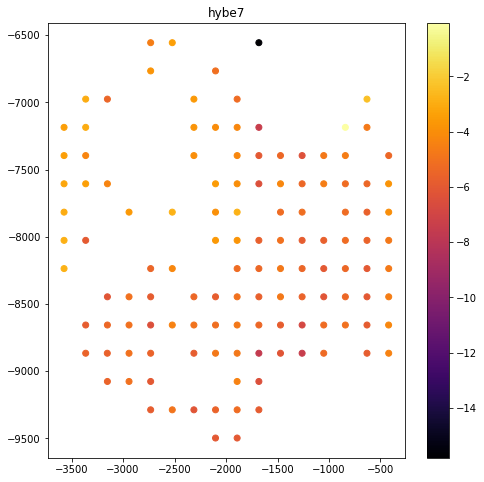

hybe8


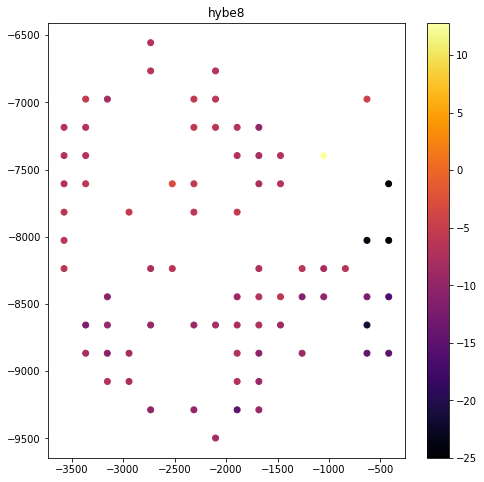

hybe9


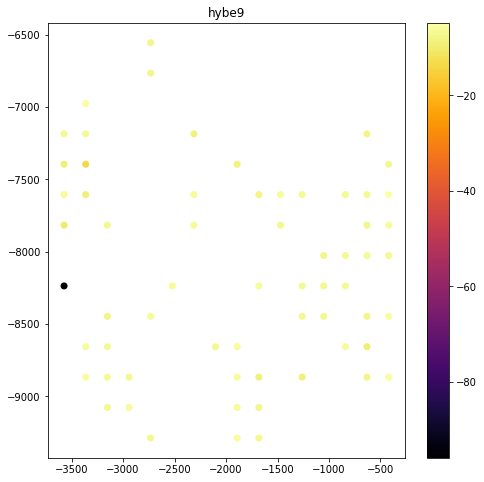

In [39]:
%matplotlib inline
poses = [i for i in md.image_table.Position.unique() if 'Pos' in i]
dim = 1
hybe = 'hybe2'
thresh = 2
pos_positions = {}
for hybe in range(2,10):
    X = []
    Y = []
    C =[]
    hybe = 'hybe'+str(hybe)
    print(hybe)
    for i,pos in enumerate(poses):
        if pos in pos_positions.keys():
            x,y = pos_positions[pos]
        else:
            pos_positions[pos] = md.image_table[md.image_table.Position==pos].XY.iloc[0]
            x,y = pos_positions[pos]
        X.append(x)
        Y.append(y)
        if pos in old_tforms['good'].keys():
            tform = old_tforms['good'][pos][hybe]
        else:
            try:
                tform = old_tforms['bad'][pos][hybe]
            except:
                C.append(np.nan)
                #C[i,:] = np.array([0,0,0,1])
                continue
        if isinstance(tform[1],str):
            C.append(np.nan)
            #C[i,:] = np.array([1,0,0,1])
            continue
        if tform[1]>thresh:
            C.append(np.nan)
            #C[i,:] = np.array([1,0,0,1])
        else:
            C.append(tform[0][dim])
            #C[i,:] = np.array([0,0,tform[0][dim],1])
    # cs = [C[i,:] for i in range(C.shape[0])]
    plt.figure(figsize=[8,8])
    plt.scatter(np.reshape(X,-1),np.reshape(Y,-1),c=C,cmap='inferno')
    plt.colorbar()
    plt.title(hybe)
    plt.show()

In [40]:
md.image_table[md.image_table.Position==pos]

,FlatField,df_pos,linescan,Position,group,acq,frame,TimestampImage,XY,PixelSize,...,Z,Zindex,XYbeforeTransform,Exposure,Channel,Triggered,Skip,TimestampFrame,filename,root_pth
12078,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014372,"[-3363.0, -8027.0]",0.1032,...,3132.641,1,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014372,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000001_000000000_DeepBlue_...
12079,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014378,"[-3363.0, -8027.0]",0.1032,...,3133.041,2,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014378,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000002_000000000_DeepBlue_...
12080,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014383,"[-3363.0, -8027.0]",0.1032,...,3133.441,3,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014383,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000003_000000000_DeepBlue_...
12081,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014389,"[-3363.0, -8027.0]",0.1032,...,3133.841,4,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014389,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000004_000000000_DeepBlue_...
12082,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014394,"[-3363.0, -8027.0]",0.1032,...,3134.241,5,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014394,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000005_000000000_DeepBlue_...
12083,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014400,"[-3363.0, -8027.0]",0.1032,...,3134.641,6,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014400,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000006_000000000_DeepBlue_...
12084,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014405,"[-3363.0, -8027.0]",0.1032,...,3135.041,7,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014405,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000007_000000000_DeepBlue_...
12085,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014410,"[-3363.0, -8027.0]",0.1032,...,3135.441,8,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014410,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000008_000000000_DeepBlue_...
12086,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014416,"[-3363.0, -8027.0]",0.1032,...,3135.841,9,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014416,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000009_000000000_DeepBlue_...
12087,NaN,0,NaN,Pos10,Pos10,nucstain_3,1,737716.014421,"[-3363.0, -8027.0]",0.1032,...,3136.241,10,"[-3362.676, -8026.685]",100,DeepBlue,False,1,737716.014421,/hybedata/Images/Zach/InVivo/18Hr_Debridement_...,Pos183/img_Pos10_000000010_000000000_DeepBlue_...


In [42]:
for i,pos in enumerate(poses):
    if pos in old_tforms['good'].keys():
            tform = old_tforms['good'][pos][hybe]
    else:
        try:
            tform = old_tforms['bad'][pos][hybe]
        except:
            continue
    if isinstance(tform[1],str):
        continue
    print(pos,':',tform[0][1])

Pos1 : -95.90703242706365
Pos3 : -10.399987768397047
Pos4 : -6.00000366903684
Pos5 : -9.200051459234741
Pos6 : -6.599967826557265
Pos14 : -6.400059941063191
Pos15 : -5.399994813782191
Pos72 : -8.39999071512165
Pos13 : -13.399987036450666
Pos12 : -9.200000029164546
Pos70 : -5.901745076562557
Pos69 : -6.399868234069796
Pos101 : -8.399995800186723
Pos47 : -7.6357831731362005
Pos48 : -7.599998436311218
Pos114 : -7.7999961869675865
Pos126 : -6.000035037007679
Pos138 : -6.437817288290923
Pos162 : -6.600002893006806
Pos173 : -6.799982787335152
Pos175 : -7.800022285111913
Pos184 : -7.196629139175727
Pos183 : -4.800038229830069
Pos182 : -5.93408604053694
Pos181 : -6.800033064495331
Pos171 : -6.80001934631421
Pos172 : -7.307715322625878
Pos160 : -6.599992152346743
Pos148 : -7.400014755810183
Pos125 : -6.99998352517399
Pos135 : -6.6000150784663685
Pos134 : -6.99997085704994
Pos146 : -6.998293696975509
Pos147 : -7.200003754496507
Pos159 : -6.599996377320674
Pos169 : -7.800125201717677
Pos179 : -5.

opening img_Pos2_000000066_000000000_FarRed_000_066.tif

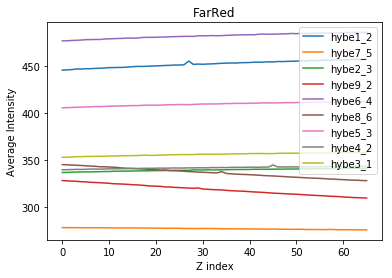

opening img_Pos2_000000066_000000000_Orange_000_066.tif

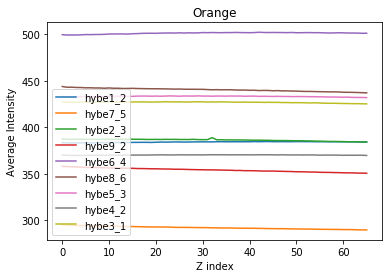

In [43]:
%matplotlib inline
photobleach_qc(md,path=False,pos='Pos2')

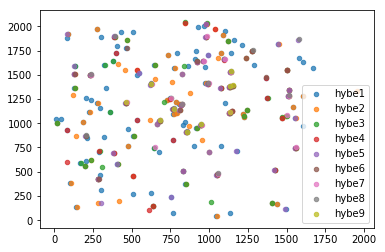

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
for hybe,coord in old_beads['Pos134'].items():
    if 'nucstain' in hybe:
        continue
    xyz = np.stack(coord)
    x = xyz[:,0]
    y = xyz[:,1]
    plt.scatter(x,y,s=20,alpha=0.75,label=hybe)
plt.legend()
plt.show()


In [4]:
from fish_helpers import *
from fish_objects import *
md_path = '/hybedata/Images/Zach/InVivo/18Hr_Debridement_2019Oct14/'
md = Metadata(md_path)
old_beads = pickle.load(open(os.path.join(md_path,'results','beads.pkl'),'rb'))
old_tforms = pickle.load(open(os.path.join(md_path,'results','tforms.pkl'),'rb'))

In [5]:
MMD = MerfishMetadata('seqfish_config_Inflammation')

In [6]:
def from_goodBad_format_to_container_objects(tforms):
    all_tforms = {}
    residuals = {}
    matched_bead_counts = {}
    ts = {}
    for p,t in tforms['good'].items():
        ts[p] = t
    for p,t in tforms['bad'].items():
        ts[p] = t
    for p, t in ts.items():
        new_t = {}
        new_r = {}
        new_bc = {}
        if isinstance(t,str):
            continue
        for h, t in t.items():
            if isinstance(t[0], str):
                new_t[h] = (np.nan, np.nan, np.nan)
                new_r[h] = np.nan
                new_bc[h] = np.nan
            else:
                new_t[h] = t[0]
                new_r[h] = t[1]
                new_bc[h] = t[2]
        all_tforms[p] = new_t
        residuals[p] = new_r
        matched_bead_counts[p] = new_bc
    return all_tforms, residuals, matched_bead_counts

In [7]:
all_tforms, old_residuals, matched_bead_counts = from_goodBad_format_to_container_objects(old_tforms)

In [1]:
reg = []
for position_name in all_tforms.keys():
    experiment = MMD
    stageXY = md.image_table[md.image_table.Position==position_name].XY.iloc[0]
    beads = old_beads[position_name]
    tforms = all_tforms[position_name]
    residuals = old_residuals[position_name]
    matched_beads = matched_bead_counts[position_name]
    pos_reg = RegistrationContainer(position_name, experiment, stageXY, 
                                    beads=beads, tforms=tforms,residuals=residuals, 
                                    matched_beads=matched_beads, residual_threshold=1, 
                                    number_beads_threshold=5)
    reg.append(pos_reg)


NameError: name 'all_tforms' is not defined

In [11]:
pickle.dump(reg,open('/hybedata/Images/Zach/InVivo/18Hr_Debridement_2019Oct14/results/reg.pkl','wb'))


In [1]:
from fish_objects import *
from fish_helpers import *
reg = pickle.load(open('/hybedata/Images/Zach/InVivo/18Hr_Debridement_2019Oct14/results/reg.pkl','rb'))


In [6]:
MPR = MultiPositionRegistration(reg)

In [7]:
predicted, has_nans, models = MPR.iterate_over_hybes_and_fit()

hybe2


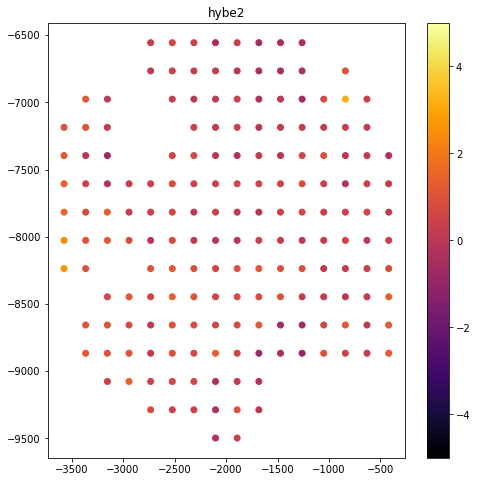

hybe3


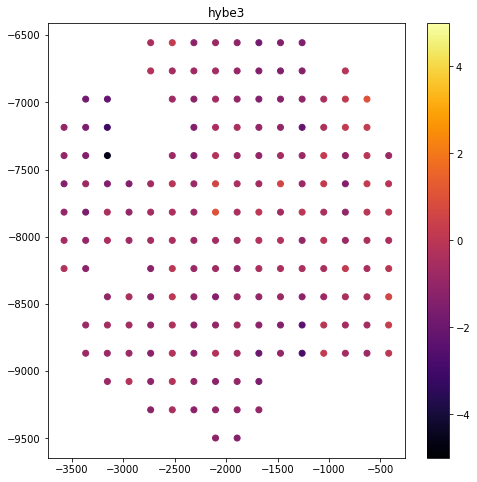

hybe4


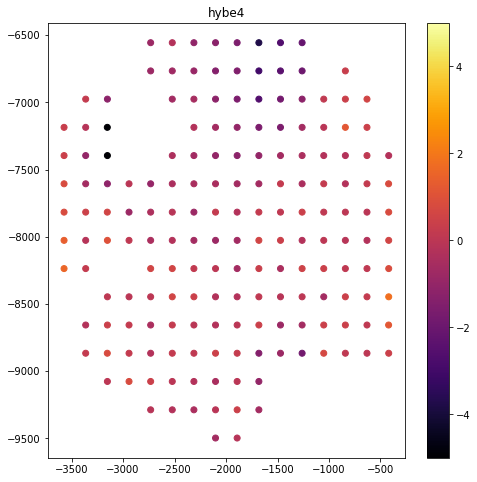

hybe5


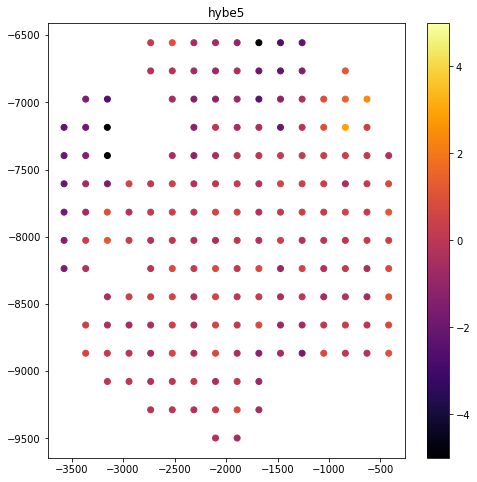

hybe6


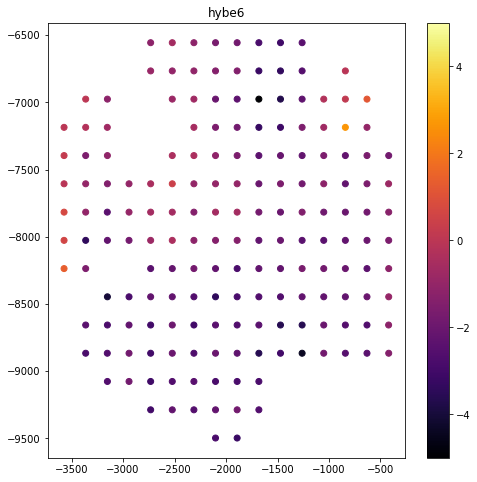

hybe7


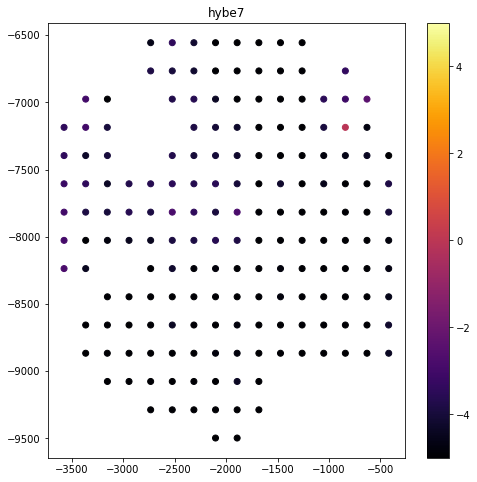

hybe8


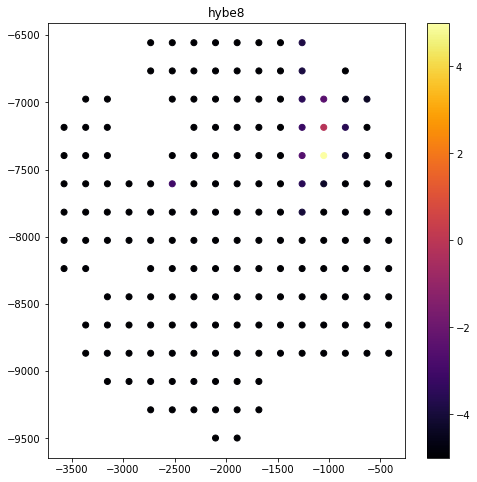

hybe9


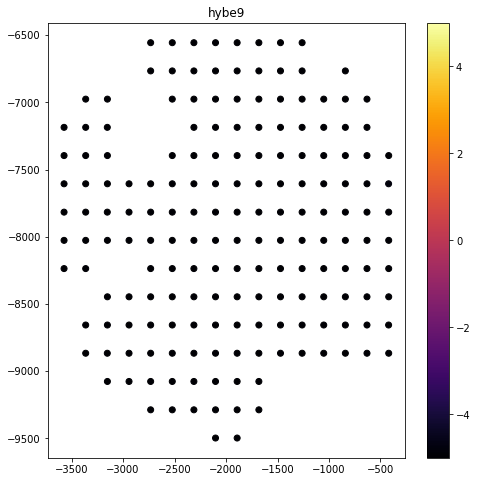

In [8]:
%matplotlib inline
poses = [i for i in predicted.keys() if 'Pos' in i]
dim = 1
thresh = 2
pos_positions = {}
for hybe in range(2,10):
    X = []
    Y = []
    C =[]
    hybe = 'hybe'+str(hybe)
    print(hybe)
    for i,pos in enumerate(poses):
        if pos in pos_positions.keys():
            x,y = pos_positions[pos]
        else:
            pos_positions[pos] = md.image_table[md.image_table.Position==pos].XY.iloc[0]
            x,y = pos_positions[pos]
        X.append(x)
        Y.append(y)
#         if pos in old_tforms['good'].keys():
#             tform = old_tforms['good'][pos][hybe]
#         else:
#             try:
#                 tform = old_tforms['bad'][pos][hybe]
#             except:
#                 C.append(np.nan)
#                 #C[i,:] = np.array([0,0,0,1])
#                 continue
#         if isinstance(tform[1],str):
#             C.append(np.nan)
#             #C[i,:] = np.array([1,0,0,1])
#             continue
#         if tform[1]>thresh:
#             C.append(np.nan)
#             #C[i,:] = np.array([1,0,0,1])
#         else:
#             C.append(tform[0][dim])
#             #C[i,:] = np.array([0,0,tform[0][dim],1])
#     # cs = [C[i,:] for i in range(C.shape[0])]
        C.append(predicted[pos][hybe][dim])
    plt.figure(figsize=[8,8])
    plt.scatter(np.reshape(X,-1),np.reshape(Y,-1),c=C,cmap='inferno',vmin=-5,vmax=5)
    plt.colorbar()
    plt.title(hybe)
    plt.show()

In [126]:
predicted.keys()

dict_keys(['Pos6', 'Pos134', 'Pos15', 'Pos106', 'Pos80', 'Pos13', 'Pos72', 'Pos107', 'Pos114', 'Pos12', 'Pos171', 'Pos48', 'Pos181', 'Pos54', 'Pos167', 'Pos14', 'Pos16', 'Pos93', 'Pos36', 'Pos7', 'Pos132', 'Pos169', 'Pos126', 'Pos94', 'Pos17', 'Pos108', 'Pos179', 'Pos159', 'Pos101', 'Pos27', 'Pos92', 'Pos4', 'Pos147', 'Pos111', 'Pos95', 'Pos177', 'Pos5', 'Pos26', 'Pos183', 'Pos19', 'Pos1', 'Pos3', 'Pos135', 'Pos47', 'Pos168', 'Pos146', 'Pos91', 'Pos170', 'Pos73', 'Pos55', 'Pos174', 'Pos121', 'Pos140', 'Pos109', 'Pos104', 'Pos41', 'Pos28', 'Pos158', 'Pos118', 'Pos143', 'Pos141', 'Pos160', 'Pos71', 'Pos25', 'Pos137', 'Pos98', 'Pos151', 'Pos60', 'Pos62', 'Pos38', 'Pos127', 'Pos136', 'Pos133', 'Pos79', 'Pos116', 'Pos145', 'Pos77', 'Pos37', 'Pos123', 'Pos23', 'Pos103', 'Pos40', 'Pos166', 'Pos173', 'Pos148', 'Pos144', 'Pos85', 'Pos76', 'Pos33', 'Pos31', 'Pos172', 'Pos165', 'Pos112', 'Pos184', 'Pos82', 'Pos44', 'Pos117', 'Pos100', 'Pos156', 'Pos29', 'Pos59', 'Pos22', 'Pos105', 'Pos149', 'Pos1

In [129]:
new_tforms = defaultdict(dict)
new_tforms['good'] = {}
new_tforms['bad'] = {}
for pos,tforms in predicted.items():
    print(pos)
    new_tforms['good'][pos] = {}
    for hybe,tform in tforms.items():
        if 'nucstain' in hybe:
            continue
        print(hybe)
        if hybe=='hybe1':
            new = np.array([0,0,0])
        else:
#             new = predicted[pos][hybe]
            new = tform
        print(new)
        new_tforms['good'][pos][hybe] = new,0,0


Pos6
hybe1
[0 0 0]
hybe2
[-6.00000017  1.00006999 -0.80000475]
hybe3
[-1.39999537 -0.99995771  1.20000778]
hybe4
[-7.0000306   0.32498914  1.59998802]
hybe5
[ 1.000025   -2.19988544  1.40000071]
hybe6
[-3.1999999  -0.0149456   2.10239458]
hybe7
[-9.40001336 -3.40000899  0.9999817 ]
hybe8
[-8.20002223 -6.56988802  1.20000051]
hybe9
[-9.20005382 -6.59996783  0.99999229]
Pos134
hybe1
[0 0 0]
hybe2
[-2.39300837  0.20000485  0.79997056]
hybe3
[-2.60004256 -1.20004537  3.00000431]
hybe4
[-0.40010916  0.02789173  1.60000822]
hybe5
[2.60241420e+00 4.85034455e-06 1.39451050e+00]
hybe6
[-3.40001218 -2.19987437  1.19997192]
hybe7
[-6.20009595 -5.5999843   2.20001119]
hybe8
[ -5.00000476 -11.20001494   0.20004731]
hybe9
[-5.19999797 -6.99997086  0.20008498]
Pos15
hybe1
[0 0 0]
hybe2
[-7.0000095   1.14737829  0.19999757]
hybe3
[-0.99937929 -1.79992857  0.59993604]
hybe4
[-6.60021066  0.19999477  0.40000357]
hybe5
[ 1.19992196 -1.59994823 -0.19999874]
hybe6
[-1.80002337e+00  6.49889801e-05  4.000057

[-5.79999487 -0.6521762   1.40000027]
hybe5
[-1.99959384e-01  7.93333614e-14  1.40000175e+00]
hybe6
[-3.40002922 -1.39999567  1.59998757]
hybe7
[-8.59997335 -3.80005103  0.20002482]
hybe8
[-6.06847038 -6.89288135  1.51671226]
hybe9
[-6.31778366 -6.55774792  0.75341978]
Pos151
hybe1
[0 0 0]
hybe2
[-3.4000014   0.99265105 -0.59984121]
hybe3
[-3.80002518  0.20000663  0.99710166]
hybe4
[-3.40000661 -0.19997334  1.00000113]
hybe5
[0.63811387 0.3161938  0.20000034]
hybe6
[-5.39998736 -1.59997232  1.20017815]
hybe7
[-8.99651023 -4.8000007   0.40000396]
hybe8
[-11.2000591   12.80004419  -0.19999796]
hybe9
[-6.46705964 -6.75858149  0.62594471]
Pos60
hybe1
[0 0 0]
hybe2
[-5.00001835  0.39994106  0.40002015]
hybe3
[-4.60003581 -0.60009751  1.40003432]
hybe4
[-5.70170882 -0.7340196   1.55115584]
hybe5
[-0.18265265 -0.180567    1.52927652]
hybe6
[-4.46107179 -1.02154376  1.73816655]
hybe7
[-9.24055734 -3.95188527  1.19294807]
hybe8
[-7.72217345 -6.24565637  1.25681741]
hybe9
[-6.18293236 -7.4738147

[0 0 0]
hybe2
[ 0.19991698  0.99998403 -0.99993814]
hybe3
[-0.4821202  -0.79999999  1.0000003 ]
hybe4
[ 2.80000005 -0.08598813  0.94473153]
hybe5
[ 3.59999624 -0.39998907  1.60000465]
hybe6
[-3.3999773  -2.6000462   0.79999267]
hybe7
[-4.19998624 -4.80011979  0.40002734]
hybe8
[-2.20000144 -5.99063356  0.9999993 ]
hybe9
[-4.9826068  -7.25217432  0.3987599 ]
Pos131
hybe1
[0 0 0]
hybe2
[-4.19996716 -0.40000871  0.80001247]
hybe3
[-3.59861497 -1.37226413  1.45820693]
hybe4
[-4.68842251 -2.61275266  1.49231418]
hybe5
[ 1.26191786 -2.62350021  2.09293099]
hybe6
[-3.96947037 -3.0158115   0.95892343]
hybe7
[-6.28212033 -9.59463989  2.1232349 ]
hybe8
[-7.8772862  -7.45969772  1.43017012]
hybe9
[-7.38834007 -7.49304428  0.31681168]
Pos102
hybe1
[0 0 0]
hybe2
[-4.5997567   0.39994202 -2.40004047]
hybe3
[-4.39927036e+00 -4.08548170e-01 -1.20836551e-04]
hybe4
[-6.19998126 -1.00006738 -0.22044866]
hybe5
[-0.80000013 -0.59998486  0.15539174]
hybe6
[-4.88178477 -1.79999994 -0.40000001]
hybe7
[-9.3991

[-10.2         -2.89672982   0.71605887]
hybe8
[-8.39996386 -6.000103    1.40006882]
hybe9
[-9.90211217e+00 -3.18526185e+01  2.73508137e-02]
Pos20
hybe1
[0 0 0]
hybe2
[ 0.7999198   1.19989512 -1.59997415]
hybe3
[-0.7989864  -0.40002066  0.99993691]
hybe4
[ 3.59999887e+00  1.00413688e+00 -1.30346519e-05]
hybe5
[3.99999469 1.19999454 0.80894526]
hybe6
[-4.19999791 -2.21155698  0.80520928]
hybe7
[-6.61179422 -4.76212184  0.90311033]
hybe8
[-7.30972072 -6.87278055  0.81151377]
hybe9
[ -5.99806305 -20.28271021  -0.70764403]
Pos180
hybe1
[0 0 0]
hybe2
[-2.60002584  0.8000168  -1.20002475]
hybe3
[-2.79999987e+00 -2.41728969e-08  2.56283501e+00]
hybe4
[-1.00000406  0.82340061  0.99999986]
hybe5
[2.40001481 0.7999685  1.40002024]
hybe6
[-5.1999756  -1.19998943  0.80002869]
hybe7
[-7.8        -4.67996168  1.39374632]
hybe8
[ -5.87650598 -18.26212273  -0.16846135]
hybe9
[-5.39729718 -6.61241982 -0.98566338]
Pos32
hybe1
[0 0 0]
hybe2
[-4.93881902  0.19535003 -0.39999976]
hybe3
[-3.60000214 -1.0000

In [117]:
predicted[pos]['hybe2']

array([-2.40016402,  0.20000116,  0.99993565])

In [106]:
new

array([-5.00739707e+00, -6.99829370e+00,  2.03257151e-05])

In [131]:
old_tforms

defaultdict(dict,
            {'good': {'Pos6': {'hybe1': (array([0, 0, 0]), 0, inf),
               'hybe2': (array([-6.00000017,  1.00006999, -0.80000475]),
                0.234784934356626,
                23),
               'hybe3': (array([-1.39999537, -0.99995771,  1.20000778]),
                0.2185221579650646,
                18),
               'hybe4': (array([-7.0000306 ,  0.32498914,  1.59998802]),
                0.29629787323869794,
                18),
               'hybe5': (array([ 1.000025  , -2.19988544,  1.40000071]),
                0.23590114122798553,
                13),
               'hybe6': (array([-3.1999999 , -0.0149456 ,  2.10239458]),
                0.30142340484301106,
                14),
               'hybe7': (array([-9.40001336, -3.40000899,  0.9999817 ]),
                0.38518867013610786,
                9),
               'hybe8': (array([-8.20002223, -6.56988802,  1.20000051]),
                0.31666860422329907,
                8),
  

In [130]:
new_tforms

defaultdict(dict,
            {'good': {'Pos6': {'hybe1': (array([0, 0, 0]), 0, 0),
               'hybe2': (array([-6.00000017,  1.00006999, -0.80000475]), 0, 0),
               'hybe3': (array([-1.39999537, -0.99995771,  1.20000778]), 0, 0),
               'hybe4': (array([-7.0000306 ,  0.32498914,  1.59998802]), 0, 0),
               'hybe5': (array([ 1.000025  , -2.19988544,  1.40000071]), 0, 0),
               'hybe6': (array([-3.1999999 , -0.0149456 ,  2.10239458]), 0, 0),
               'hybe7': (array([-9.40001336, -3.40000899,  0.9999817 ]), 0, 0),
               'hybe8': (array([-8.20002223, -6.56988802,  1.20000051]), 0, 0),
               'hybe9': (array([-9.20005382, -6.59996783,  0.99999229]),
                0,
                0)},
              'Pos134': {'hybe1': (array([0, 0, 0]), 0, 0),
               'hybe2': (array([-2.39300837,  0.20000485,  0.79997056]), 0, 0),
               'hybe3': (array([-2.60004256, -1.20004537,  3.00000431]), 0, 0),
               'hybe4':

In [132]:
pickle.dump(new_tforms,open('/hybedata/Images/Zach/InVivo/18Hr_Debridement_2019Oct14/results/new_tforms.pkl','wb'))

In [16]:
pos = 'Pos6'
hybe = 'hybe2'
model = models[pos][hybe]
for i,f in enumerate(MPR._fovs):
    posname = f.position_name
    if posname in old_tforms['good'].keys():
        print(posname)
        new = model.predicted_translations[i]
        old = old_tforms['good'][posname][hybe]
        print('new:',new)
        print('old:',old)

Pos6
new: [-6.00000017  1.00006999 -0.80000475]
old: (array([-6.00000017,  1.00006999, -0.80000475]), 0.234784934356626, 23)
Pos134
new: [-2.39300837  0.20000485  0.79997056]
old: (array([-2.39300837,  0.20000485,  0.79997056]), 0.2925477233997478, 78)
Pos15
new: [-7.0000095   1.14737829  0.19999757]
old: (array([-7.0000095 ,  1.14737829,  0.19999757]), 0.28338637248552023, 34)
Pos106
new: [-6.00002201e-01  3.44406732e-05 -1.20012006e+00]
old: (array([-6.00002201e-01,  3.44406732e-05, -1.20012006e+00]), 0.25484080516701635, 124)
Pos80
new: [ 4.06739401e-05  6.00022502e-01 -4.32397160e-04]
old: (array([ 4.06739401e-05,  6.00022502e-01, -4.32397160e-04]), 0.27422121564714935, 62)
Pos13
new: [-5.60109132e+00 -2.16244632e-06 -7.99998471e-01]
old: (array([-5.60109132e+00, -2.16244632e-06, -7.99998471e-01]), 0.2746813822016659, 25)
Pos72
new: [-5.71662853  0.39701782 -0.80000002]
old: (array([-5.71662853,  0.39701782, -0.80000002]), 0.28333333464235294, 12)
Pos107
new: [-1.20000186 -0.199976

In [29]:
new_tforms

defaultdict(dict,
            {'good': {'Pos6': {'hybe1': (array([[0., 0., 0.]]), 0, 0),
               'hybe2': (array([-6.00000017,  1.00006999, -0.80000475]), 0, 0),
               'hybe3': (array([-1.39999537, -0.99995771,  1.20000778]), 0, 0),
               'hybe4': (array([-7.0000306 ,  0.32498914,  1.59998802]), 0, 0),
               'hybe5': (array([ 1.000025  , -2.19988544,  1.40000071]), 0, 0),
               'hybe6': (array([-3.1999999 , -0.0149456 ,  2.10239458]), 0, 0),
               'hybe7': (array([-9.40001336, -3.40000899,  0.9999817 ]), 0, 0),
               'hybe8': (array([-8.20002223, -6.56988802,  1.20000051]), 0, 0),
               'hybe9': (array([-9.20005382, -6.59996783,  0.99999229]),
                0,
                0)},
              'Pos134': {'hybe1': (array([[0., 0., 0.]]), 0, 0),
               'hybe2': (array([-2.39300837,  0.20000485,  0.79997056]), 0, 0),
               'hybe3': (array([-2.60004256, -1.20004537,  3.00000431]), 0, 0),
             

In [122]:
{k: (v[0][0],v[0][1],int(np.round(np.mean(v[0][2])))) for k,v in new_tforms['good']['Pos6'].items() if k!='nucstain'}

{'hybe1': (0, 0, 0),
 'hybe2': (-6.000000165932091, 1.0000699916141367, -1),
 'hybe3': (-1.399995365792092, -0.9999577101023445, 1),
 'hybe4': (-7.000030599833072, 0.32498914018421443, 2),
 'hybe5': (1.0000249961509313, -2.1998854446210485, 1),
 'hybe6': (-3.199999900838651, -0.014945602109724176, 2),
 'hybe7': (-9.400013361921044, -3.4000089856345523, 1),
 'hybe8': (-8.200022226736085, -6.569888016293737, 1),
 'hybe9': (-9.200053820427105, -6.599967826557265, 1)}

In [94]:
for k,v in new_tforms['good']['Pos6'].items():
    break

In [97]:
v[0][0]

array([0., 0., 0.])

In [89]:
v[0][2]

IndexError: list index out of range

In [54]:
for k0,v0 in old_tforms['good']['Pos6'].items():
    break

In [55]:
v0

(array([0, 0, 0]), 0, inf)

In [72]:
new_tforms['good']['Pos6'].items()

dict_items([('hybe1', (array([0., 0., 0.]), 0, 0)), ('hybe2', (-6.000000165932091, 0, 0)), ('hybe3', (-1.399995365792092, 0, 0)), ('hybe4', (-7.000030599833072, 0, 0)), ('hybe5', (1.0000249961509313, 0, 0)), ('hybe6', (-3.199999900838651, 0, 0)), ('hybe7', (-9.400013361921044, 0, 0)), ('hybe8', (-8.200022226736085, 0, 0)), ('hybe9', (-9.200053820427105, 0, 0))])

In [73]:
old_tforms['good']['Pos6'].items()

dict_items([('hybe1', (array([0, 0, 0]), 0, inf)), ('hybe2', (array([-6.00000017,  1.00006999, -0.80000475]), 0.234784934356626, 23)), ('hybe3', (array([-1.39999537, -0.99995771,  1.20000778]), 0.2185221579650646, 18)), ('hybe4', (array([-7.0000306 ,  0.32498914,  1.59998802]), 0.29629787323869794, 18)), ('hybe5', (array([ 1.000025  , -2.19988544,  1.40000071]), 0.23590114122798553, 13)), ('hybe6', (array([-3.1999999 , -0.0149456 ,  2.10239458]), 0.30142340484301106, 14)), ('hybe7', (array([-9.40001336, -3.40000899,  0.9999817 ]), 0.38518867013610786, 9)), ('hybe8', (array([-8.20002223, -6.56988802,  1.20000051]), 0.31666860422329907, 8)), ('hybe9', (array([-9.20005382, -6.59996783,  0.99999229]), 0.2933406072783608, 5)), ('nucstain', 'Not enough bead pairs found.')])

In [70]:
{k: (v[0][0],v[0][1],int(np.round(np.mean(v[0][2])))) for k,v in old_tforms['good']['Pos6'].items() if k!='nucstain'}

{'hybe1': (0, 0, 0),
 'hybe2': (-6.000000165932091, 1.0000699916141367, -1),
 'hybe3': (-1.399995365792092, -0.9999577101023445, 1),
 'hybe4': (-7.000030599833072, 0.32498914018421443, 2),
 'hybe5': (1.0000249961509313, -2.1998854446210485, 1),
 'hybe6': (-3.199999900838651, -0.014945602109724176, 2),
 'hybe7': (-9.400013361921044, -3.4000089856345523, 1),
 'hybe8': (-8.200022226736085, -6.569888016293737, 1),
 'hybe9': (-9.200053820427105, -6.599967826557265, 1)}

In [22]:
old_tforms

defaultdict(dict,
            {'good': {'Pos6': {'hybe1': (array([0, 0, 0]), 0, inf),
               'hybe2': (array([-6.00000017,  1.00006999, -0.80000475]),
                0.234784934356626,
                23),
               'hybe3': (array([-1.39999537, -0.99995771,  1.20000778]),
                0.2185221579650646,
                18),
               'hybe4': (array([-7.0000306 ,  0.32498914,  1.59998802]),
                0.29629787323869794,
                18),
               'hybe5': (array([ 1.000025  , -2.19988544,  1.40000071]),
                0.23590114122798553,
                13),
               'hybe6': (array([-3.1999999 , -0.0149456 ,  2.10239458]),
                0.30142340484301106,
                14),
               'hybe7': (array([-9.40001336, -3.40000899,  0.9999817 ]),
                0.38518867013610786,
                9),
               'hybe8': (array([-8.20002223, -6.56988802,  1.20000051]),
                0.31666860422329907,
                8),
  

In [90]:
new_tforms

defaultdict(dict,
            {'good': {'Pos6': {'hybe1': ([array([0., 0., 0.])], 0, 0),
               'hybe2': ([-6.000000165932091,
                 1.0000699916141367,
                 -0.8000047533190046],
                0,
                0),
               'hybe3': ([-1.399995365792092,
                 -0.9999577101023445,
                 1.2000077844572359],
                0,
                0),
               'hybe4': ([-7.000030599833072,
                 0.32498914018421443,
                 1.5999880223879714],
                0,
                0),
               'hybe5': ([1.0000249961509313,
                 -2.1998854446210485,
                 1.4000007080516956],
                0,
                0),
               'hybe6': ([-3.199999900838651,
                 -0.014945602109724176,
                 2.102394583305289],
                0,
                0),
               'hybe7': ([-9.400013361921044,
                 -3.4000089856345523,
                 0.99

In [124]:
len(old_tforms['good'].keys())

46

In [125]:
len(new_tforms['good'].keys())

46